In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import pylab
from sklearn.linear_model import LinearRegression

data = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv', sep=',')

archivo = open('C:\\Users\\Javi\\Desktop\\Porcentaje Vacunación RM.csv','r')
lector = csv.reader(archivo, delimiter=";")

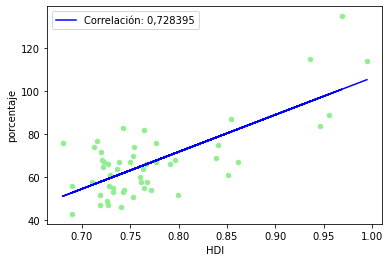

In [2]:
comunas = []
for fila in lector:
    if lector.line_num > 1:
        comuna = {'nombre':fila[0], 'codigo':fila[7], 'porcentaje':fila[6]}
        comunas.append(comuna)
        
for c in comunas:
    c['porcentaje'] = int(c['porcentaje'].replace('%',''))

for i in range(len(data['comuna'])):
    for c in comunas:
        if int(c['codigo']) == int(data['comuna'][i]):
            c['HDI'] = float(data['HDI'][i])

df = pd.DataFrame(comunas)
df = df.drop(['nombre', 'codigo'], axis=1)

correlacion = df.corr(method='pearson')

X = []
for x in df['HDI']:
    X.append(x)
Y = []
for y in df['porcentaje']:
    Y.append(y)

df.plot.scatter(x='HDI', y='porcentaje', c='LightGreen')
m, b = np.polyfit(X, Y, 1)
mx = []
for i in X:
    mx.append(m*i)
    
plt.plot(X, mx + b, label='Correlación: 0,728395', color='Blue')
plt.legend()
plt.show()

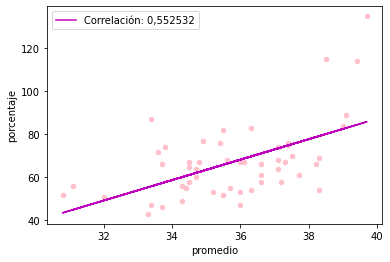

In [3]:
archivo2 = open('C:\\Users\\Javi\\Desktop\\Edad_Promedio_Comuna.csv','r')
lector2 = csv.reader(archivo2, delimiter=";")
edad_com = []
for fila in lector2:
    if lector2.line_num > 1:
        edad = {'edad':float(fila[1]), 'cod':int(fila[2])}
        edad_com.append(edad)
        
for c in comunas:
    for e in edad_com:
        if int(c['codigo']) == (e['cod']):
            c['promedio'] = (e['edad'])

df2 = pd.DataFrame(comunas)
df2 = df2.drop(['nombre', 'codigo', 'HDI'], axis=1)

correlacion2 = df2.corr(method='pearson')

X2 = []
for x in df2['promedio']:
    X2.append(x)
Y2 = []
for y in df2['porcentaje']:
    Y2.append(y)

df2.plot.scatter(x='promedio', y='porcentaje', c='Pink')
m2, b2 = np.polyfit(X2, Y2, 1)
mx2 = []
for i in X2:
    mx2.append(m2*i)
    
plt.plot(X2, mx2 + b2, label='Correlación: 0,552532', color='m')
plt.legend()
plt.show()

In [4]:
#Si bien, la correlación entre el Indice de Desarrollo Humano y el porcentaje de población vacunada por comuna es
# muy alto, luego de analizar las correlaciones en ambos casos se puede concluir que efectivamente en las comunas 
#con mayor Indice de Desarrollo Humano se concentran las personas de mayor edad, lo que explicaría el porcentaje 
# tan elevado de la primera correlación.
#
#
#En el caso de los porcentajes de vacunación por comuna se puede apreciar que existe un error ya que en algunos
#casos este supera el 100%. Esto se debe a que la cantidad de población total por comuna se obtuvo de datos del 
#censo 2017, en cambio, la cantidad de población vacunada son datos actualizados hasta la fecha.
#
#Finalmente, se podría decir que el efecto de que las comunas con mayor ingresos fueron vacunadas primero se 
#podría deber a que son las comunas que concentran las personas de mayor edad. Aunque también podrían existir 
#otros factores (que no fueron analizados para el caso) como por ejemplo el porcentaje de funcionarios del 
#área de la salud en cada comuna.
#